<a href="https://colab.research.google.com/github/kirti-github/colorectal_histology_classification/blob/main/colorectal_histology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/drive/'My Drive'/texture_ana_dataset.zip -d /content/colo_hist_samples

Streaming output truncated to the last 5000 lines.
  inflating: /content/colo_hist_samples/texture_ana_dataset/test_set/01_TUMOR/12E46_CRC-Prim-HE-02_004.tif_Row_151_Col_301.tif  
  inflating: /content/colo_hist_samples/texture_ana_dataset/test_set/01_TUMOR/12EB3_CRC-Prim-HE-05_025.tif_Row_1_Col_1.tif  
  inflating: /content/colo_hist_samples/texture_ana_dataset/test_set/01_TUMOR/12F03_CRC-Prim-HE-10_027.tif_Row_1_Col_1.tif  
  inflating: /content/colo_hist_samples/texture_ana_dataset/test_set/01_TUMOR/12F08_CRC-Prim-HE-02_007b.tif_Row_301_Col_1.tif  
  inflating: /content/colo_hist_samples/texture_ana_dataset/test_set/01_TUMOR/12F1B_CRC-Prim-HE-09_026.tif_Row_151_Col_301.tif  
  inflating: /content/colo_hist_samples/texture_ana_dataset/test_set/01_TUMOR/12F96_CRC-Prim-HE-02_025.tif_Row_151_Col_601.tif  
  inflating: /content/colo_hist_samples/texture_ana_dataset/test_set/01_TUMOR/13A16_CRC-Prim-HE-09_022.tif_Row_1_Col_151.tif  
  inflating: /content/colo_hist_samples/texture_ana_datas

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

In [ ]:
# Initializing the classifier model

classifier=Sequential()

# Convolution layer - 1
classifier.add(Conv2D(128,kernel_size=(5,5),strides=(2,2),
                      input_shape=(150,150,3), activation='relu'))

# Pooling layer - 1
classifier.add(MaxPooling2D(pool_size=(2,2)))
# Dropout - 1 
classifier.add(Dropout(rate=0.25))


# Convolution layer - 2
classifier.add(Conv2D(64,kernel_size=(3,3),strides=(2,2), activation='relu'))

# Pooling layer - 2
classifier.add(MaxPooling2D(pool_size=(2,2)))

# Dropout - 2
classifier.add(Dropout(rate=0.25))

# Flattening the matrix to a vector
classifier.add(Flatten())

# Fully connected layer
classifier.add(Dense(units=256, activation='relu'))

# Dropout - 3
classifier.add(Dropout(rate=0.25))
classifier.add(Dense(units = 128, activation = 'relu'))

# Output layer
classifier.add(Dense(units=8, activation='softmax'))


In [ ]:
# Compiling the model
classifier.compile(optimizer='adam', loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 73, 73, 128)       9728      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 17, 17, 64)        73792     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

In [ ]:
# Creating training data generator
batch_size =  200

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        horizontal_flip=True,
        vertical_flip=True)

# Creating validation data generator
val_datagen = ImageDataGenerator(rescale=1./255)

# Getting the training data
training_set = train_datagen.flow_from_directory(
        '/content/colo_hist_samples/texture_ana_dataset/training_set',
        color_mode="rgb",
        target_size=(150,150),   
        batch_size=batch_size,#40,
        shuffle=True,
        seed=42,
        class_mode='categorical')

steps_per_epoch = training_set.n // training_set.batch_size

# Getting the validation data
val_set = val_datagen.flow_from_directory(
        '/content/colo_hist_samples/texture_ana_dataset/val_set',
        color_mode="rgb",
        target_size=(150,150),
        batch_size=50,
        shuffle=True,
        seed=42,
        class_mode='categorical')

Found 3240 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


In [ ]:
best_model = '/content/drive/MyDrive/Colab Notebooks/best_model_col_hist.h5'

In [ ]:
chkpoint = ModelCheckpoint(best_model, monitor='val_accuracy', verbose=1, save_best_only=True, model='auto')
hist_data=classifier.fit_generator(
            training_set,
            steps_per_epoch=steps_per_epoch,
            epochs=500,
            validation_data=val_set,
            callbacks = [chkpoint])

Epoch 1/500
16/16 [==============================] - ETA: 0s - loss: 1.8859 - accuracy: 0.1898
Epoch 00001: val_accuracy improved from -inf to 0.27750, saving model to /content/drive/MyDrive/Colab Notebooks/best_model_col_hist.h5
16/16 [==============================] - 21s 1s/step - loss: 1.8859 - accuracy: 0.1898 - val_loss: 1.5733 - val_accuracy: 0.2775
Epoch 2/500
16/16 [==============================] - ETA: 0s - loss: 1.5120 - accuracy: 0.3421
Epoch 00002: val_accuracy improved from 0.27750 to 0.46125, saving model to /content/drive/MyDrive/Colab Notebooks/best_model_col_hist.h5
16/16 [==============================] - 20s 1s/step - loss: 1.5120 - accuracy: 0.3421 - val_loss: 1.3346 - val_accuracy: 0.4613
Epoch 3/500
16/16 [==============================] - ETA: 0s - loss: 1.2071 - accuracy: 0.4536
Epoch 00003: val_accuracy improved from 0.46125 to 0.48250, saving model to /content/drive/MyDrive/Colab Notebooks/best_model_col_hist.h5
16/16 [==============================] - 20s 1

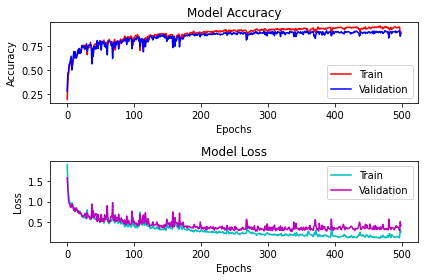

In [ ]:
fig = plt.figure()
# Plotting Accuracy of training and validation set
plt.subplot(2,1,1)
plt.plot(hist_data.history['accuracy'],'r')
plt.plot(hist_data.history['val_accuracy'],'b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plotting loss of training and validation set
plt.subplot(2,1,2)
plt.plot(hist_data.history['loss'],'c')
plt.plot(hist_data.history['val_loss'],'m')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()

In [ ]:
from keras.models import load_model
classifier = load_model(best_model)

In [ ]:
# Creating test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

# Getting the test data
test_set = test_datagen.flow_from_directory(
        '/content/colo_hist_samples/texture_ana_dataset/test_set',
        color_mode="rgb",
        target_size=(150,150),
        batch_size=1,
        shuffle=False,
        class_mode='categorical')

step_size_test=test_set.n//test_set.batch_size
# Resetting the test generator to avoid getting wrong results
test_set.reset()

Found 960 images belonging to 8 classes.


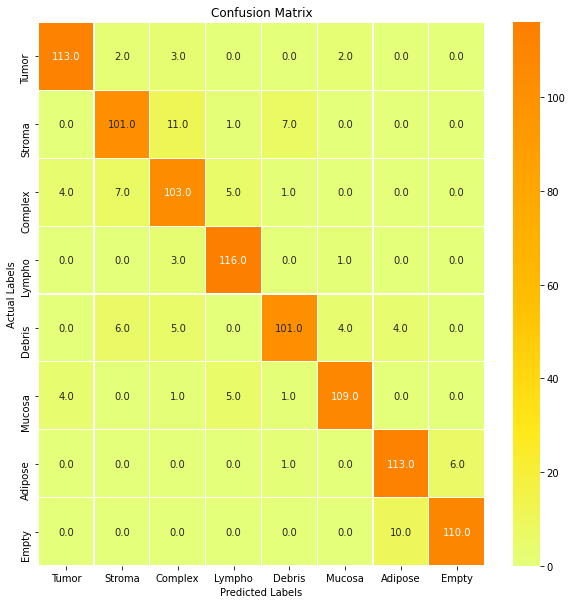

In [ ]:
# Making predictions
predictions=classifier.predict_generator(test_set, step_size_test)

# Predicted classes
y_pred=np.argmax(predictions,axis=1)

# Actual classes
y_true = test_set.classes

labels = ['Tumor', 'Stroma', 'Complex', 'Lympho', 'Debris', 'Mucosa', 'Adipose', 'Empty']
# Plotting the confusion matrix
c_matrix=confusion_matrix(y_true, y_pred)
plot,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(c_matrix, annot=True, linewidths=0.05,cmap="Wistia", fmt= '.1f'
            ,ax=ax)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Generating classification report
print('Classification Report')
print(classification_report(test_set.classes, y_pred, 
                            target_names=labels))

Classification Report
              precision    recall  f1-score   support

       Tumor       0.93      0.94      0.94       120
      Stroma       0.87      0.84      0.86       120
     Complex       0.82      0.86      0.84       120
      Lympho       0.91      0.97      0.94       120
      Debris       0.91      0.84      0.87       120
      Mucosa       0.94      0.91      0.92       120
     Adipose       0.89      0.94      0.91       120
       Empty       0.95      0.92      0.93       120

    accuracy                           0.90       960
   macro avg       0.90      0.90      0.90       960
weighted avg       0.90      0.90      0.90       960



In [ ]:
# Saving the model for future use
dir_path = '/content/drive/MyDrive/Colab Notebooks/'
classifier.save(dir_path + 'colorectal_hist_90.h5')
print('Model saved!!')

Model saved!!


In [ ]:
# Saving the training history
hist_datafr = pd.DataFrame(hist_data.history) 
# saving to json file 
json_file = dir_path + 'training_history_colorectal_hist90.json' 
with open(json_file, mode='w') as jfile:
    hist_datafr.to_json(jfile)